# Not So Long Ago, In a Dataset...
**Star Wars Fans Preference Analysis**

# Index

- [1 Introduction](#1)
- [2 Reading the Data](#2)
- [3 Clean the Data, we must..](#3)
- [4 Fan Force](#4)
- [5 Fan Favourite](#5)
- [6 Wait...I've Seen That](#6)
- [7 Quite the Character](#7)
- [8 Hans? Greedo? Who Knows?!](#8)
- [9 Conclusion](#9)
- [10 Learnings](#10)
- [11 Acknowledgment](#11)

# 1

## Introduction

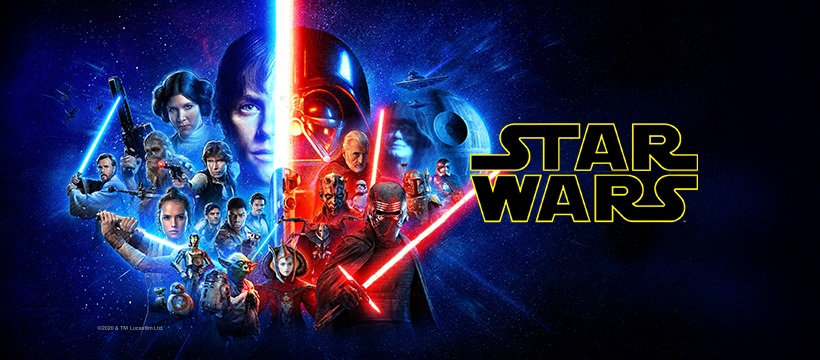
*Source*:[facebook](https://www.facebook.com/starwarsmovies/)

**Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?** This was the question that the team at [fivethrityeight](http://fivethirtyeight.com/) were trying to get an answer to, right before the movie release of [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens).

They conducted a survey using [Survey Monkey](https://www.surveymonkey.com/) and received [835 responses](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey). Besides the above questions, the survey was also used to get a better understanding about Star Wars fans. The questions in the survey reveal the same.

The goal of this project is to:
- Clean and analyse the survey data
- Get a better understanding of who Star Wars fans are
- Analyze how fans respond to movies previously released in the Star Wars Franchise
- Analyze charachter preferences across the previously released movies from 11 charachters

[Index](#Index)

# 2

## Reading the data

The data required for this analysis has been provided in the [github repository of fivethirtyeight](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey). We shall read the data below.

In [1]:
import pandas as pd

#Read the data
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
pd.options.display.max_columns = 50
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [2]:
star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


There are multiple issues with the data that have been detailed below:
- The column names, while sensible, are long and inconsistent with python standards
- The columns associated to the reply of the survey questions have values which are either *Yes*, *No*, *NaN* or the name of the columns themselves

These issues need to be corrected before proceeding with analysis.

[Index](#Index)

# 3

## Clean the Data We Must..
**Cleaning the dataset**

We can begin by cleaning the column names. The column names are very descriptive and need to be shortened so that they can be referred to easily during analysis.

In [3]:
#Re-name columns
star_wars.rename(columns={'RespondentID':'participant_id',
                          'Have you seen any of the 6 films in the Star Wars franchise?':'watched_any',
                          'Do you consider yourself to be a fan of the Star Wars film franchise?':'star_wars_fan',
                          'Which of the following Star Wars films have you seen? Please select all that apply.':'episode_1',
                          'Unnamed: 4':'episode_2',
                          'Unnamed: 5':'episode_3',
                          'Unnamed: 6':'episode_4',
                          'Unnamed: 7':'episode_5',
                          'Unnamed: 8':'episode_6',
                          'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'rating_ep1',
                          'Unnamed: 10':'rating_ep2',
                          'Unnamed: 11':'rating_ep3', 
                          'Unnamed: 12':'rating_ep4', 
                          'Unnamed: 13':'rating_ep5',
                          'Unnamed: 14':'rating_ep6',
                          'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'han_solo',
                          'Unnamed: 16':'luke_skywalker', 
                          'Unnamed: 17':'princess_leia', 
                          'Unnamed: 18':'anakin_skywalker', 
                          'Unnamed: 19':'obi_wan',
                          'Unnamed: 20':'emperor_palpatine', 
                          'Unnamed: 21':'darth_vader', 
                          'Unnamed: 22':'lando_calrissian', 
                          'Unnamed: 23':'boba_fett',
                          'Unnamed: 24':'c_3po', 
                          'Unnamed: 25':'r2_d2', 
                          'Unnamed: 26':'jar_jar_binks', 
                          'Unnamed: 27':'padme_amidala',
                          'Unnamed: 28':'yoda', 
                          'Which character shot first?':'shot_first',
                          'Are you familiar with the Expanded Universe?':'know_expand_uni',
                          'Do you consider yourself to be a fan of the Expanded Universe?':'expand_uni_fan',
                          'Do you consider yourself to be a fan of the Star Trek franchise?':'star_trek_fan',
                          'Gender':'gender', 'Age':'age', 'Household Income':'income', 'Education':'education',
                          'Location (Census Region)':'location'},inplace=True)

After renaming the columns, it is now easier to analyse the columns. Next we shall clean the data in each of these columns.

In [4]:
star_wars.head(3)

,participant_id,watched_any,star_wars_fan,episode_1,episode_2,episode_3,episode_4,episode_5,episode_6,rating_ep1,rating_ep2,rating_ep3,rating_ep4,rating_ep5,rating_ep6,han_solo,luke_skywalker,princess_leia,anakin_skywalker,obi_wan,emperor_palpatine,darth_vader,lando_calrissian,boba_fett,c_3po,r2_d2,jar_jar_binks,padme_amidala,yoda,shot_first,know_expand_uni,expand_uni_fan,star_trek_fan,gender,age,income,education,location
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


Based on the analysis of the above columns we can identify columns sets as detailed below:
- The first two columns following *participant_id* and the last three columns before *gender* column have only values *Yes*, *No* or *NaN*. The *Yes* and *No* values can be replaced by boolean values *True* and *False*
- The columns associated to whether a movie was seen. Columns prefixed with *episode*
- The columns associated to movie ratings.
- The columns associated to ratings given to each charachter of the franchise.
Lets clean the same column sets below

### Clean Columns with Yes/No data

We can clean the columns with *Yes*/*No* values by replacing the values with boolean *True* and *False*.

In [5]:
import numpy as np
#Re-name first two columns after participant-id
star_wars.loc[:,'watched_any':'star_wars_fan'] = star_wars.loc[:,'watched_any':'star_wars_fan'].applymap(lambda val:True if val=='Yes' else (False if val=='No' else np.NaN))

#Re-name the other yes/no columns
star_wars.loc[:,'know_expand_uni':'star_trek_fan'] = star_wars.loc[:,'know_expand_uni':'star_trek_fan'].applymap(lambda val:True if val=='Yes' else (False if val=='No' else np.NaN))

In [6]:
star_wars.loc[:,'watched_any':'star_wars_fan'].head(2)

,watched_any,star_wars_fan
0,True,True
1,False,NaN


In [7]:
star_wars.loc[:,'know_expand_uni':'star_trek_fan'].head(2)

,know_expand_uni,expand_uni_fan,star_trek_fan
0,True,False,False
1,NaN,NaN,True


### Cleaning columns with Episode Ratings

The columns which are preceded by the word *episode* will have boolean *True* set against it where the value in the column is the name of the column.

In [8]:
#Display columns related to episode ratings
episode_columns = [each for each in star_wars.columns if 'episode' in each]
star_wars[episode_columns].head(3)

,episode_1,episode_2,episode_3,episode_4,episode_5,episode_6
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN


In [9]:
star_wars[episode_columns] = star_wars[episode_columns].applymap(lambda val:np.NaN if val is np.NaN else True)

In [10]:
star_wars[episode_columns].head(3)

,episode_1,episode_2,episode_3,episode_4,episode_5,episode_6
0,True,True,True,True,True,True
1,NaN,NaN,NaN,NaN,NaN,NaN
2,True,True,True,NaN,NaN,NaN


### Cleaning columns with Ratings of each Character

In [11]:
star_wars[star_wars.columns[15:29]].head(4)

,han_solo,luke_skywalker,princess_leia,anakin_skywalker,obi_wan,emperor_palpatine,darth_vader,lando_calrissian,boba_fett,c_3po,r2_d2,jar_jar_binks,padme_amidala,yoda
0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably


Each of the character columns have the below values. These values will be replaced with appropriate scores which should help to calculate the ratings for each charachter of the franchise.

- Unfamiliar (N/A): np.NaN 
- Very favorably: 2
- Somewhat favorably: 1
- Neither favorably nor unfavorably (neutral): 0
- Somewhat unfavorably: -1
- Very unfavorably: -2    

In [12]:
star_wars['obi_wan'].value_counts(dropna=True)

Very favorably                                 591
Somewhat favorably                             159
Neither favorably nor unfavorably (neutral)     43
Unfamiliar (N/A)                                17
Somewhat unfavorably                             8
Very unfavorably                                 7
Name: obi_wan, dtype: int64

In [13]:
ratings_dict = {'Very favorably':2,
                'Somewhat favorably':1,
                'Neither favorably nor unfavorably (neutral)':0,
                'Somewhat unfavorably':-1,
                'Very unfavorably':-2,
                'Unfamiliar (N/A)':3}
char_cols = star_wars.columns[15:29]
star_wars[char_cols] = star_wars[char_cols].applymap(lambda rating:np.NaN if rating is np.NaN else ratings_dict[rating])
star_wars[char_cols].head(4)

,han_solo,luke_skywalker,princess_leia,anakin_skywalker,obi_wan,emperor_palpatine,darth_vader,lando_calrissian,boba_fett,c_3po,r2_d2,jar_jar_binks,padme_amidala,yoda
0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,-1.0,2.0,2.0,2.0,2.0,2.0


### Cleaning the Age Column

The *age* column holds age ranges as opposed to the actual age of the individual.

In [14]:
star_wars['age'].value_counts(dropna=False)

45-60    291
> 60     269
30-44    268
18-29    218
NaN      140
Name: age, dtype: int64

The *age* column can be categorized in to four group:
- \>60: Boomers
- 45-60: Gen X
- 30-44: Gen Y
- 18-29: Gen Z

This categorization can be mapped to the *age* column to enable easier analysis.

In [15]:
age_dict = {'> 60':'Boomers',
            '45-60':'Gen X',
            '30-44':'Gen Y',
            '18-29':'Gen Z'}
star_wars['age'] = star_wars['age'].apply(lambda age_range:np.NaN if age_range is np.NaN else age_dict[age_range])
star_wars['age'].value_counts()

Gen X      291
Boomers    269
Gen Y      268
Gen Z      218
Name: age, dtype: int64

### Cleaning the Income column

The *income* column has the same issue as we had with *age*. This to will be categorized based on the ranges.

In [16]:
star_wars['income'].value_counts()

$50,000 - $99,999      298
$25,000 - $49,999      186
$100,000 - $149,999    141
$0 - $24,999           138
$150,000+               95
Name: income, dtype: int64

The *income* column can be categorized as follows:
- \\$0 - \$24,999: Low
- \\$50000 - \$99,999: Lower Middle     
- \\$25000 - \$49,999: Middle      
- \\$100000 - \$149,999: Upper Middle              
- \\$150000+: High              

In [17]:
income_dict = {"$50,000 - $99,999":"Lower Middle",
               "$25,000 - $49,999":"Middle",
               "$100,000 - $149,999":"Upper Middle",
               "$0 - $24,999":"Low",
               "$150,000+":"High"}
star_wars['income'] = star_wars['income'].map(income_dict)
star_wars['income'].head(5)

0             NaN
1             Low
2             Low
3    Upper Middle
4    Upper Middle
Name: income, dtype: object

### Cleaning the Education column

In [18]:
star_wars['education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: education, dtype: int64

Neither the column nor the data in it has any specific issues. But we could re-name the data to make it more friendly for annotating the plots.

In [19]:
education_dict = {'Bachelor degree':'Bachelors',
                  'Some college or Associate degree':'Diploma',
                  'Graduate degree':'Masters',
                  'High school degree':'High School',
                  'Less than high school degree':'Primary School'}
star_wars['education']=star_wars['education'].map(education_dict)
star_wars['education'].head(5)

0    High School
1      Bachelors
2    High School
3        Diploma
4        Diploma
Name: education, dtype: object

In [20]:
star_wars['star_wars_fan'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: star_wars_fan, dtype: int64

Now that we have cleaned all the columns lets verify the data set as a whole and verify the state of the null values in the data.

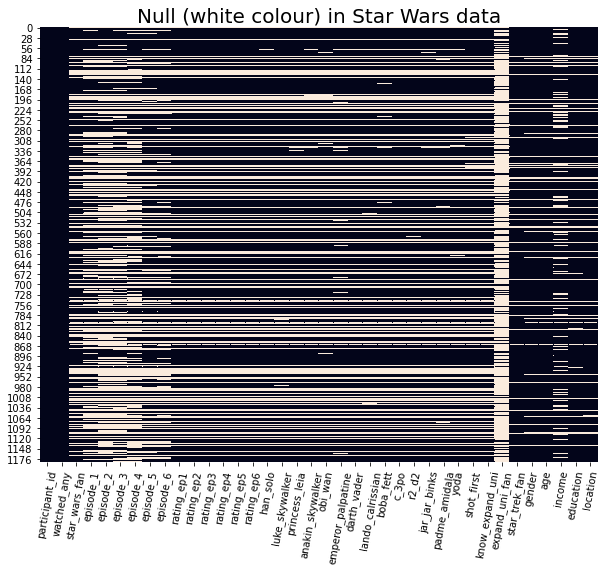

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
check = star_wars.isnull()
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(check,cbar=False)
ax.set_xticklabels(labels = star_wars.columns, rotation=80)
ax.set_title("Null (white colour) in Star Wars data", size=20)
plt.show()

Clearly, there are a number of rows in the data set that are invalid. There are a number of participants who haven't highlighted their position with regards to being a fan. A quick assessment of those rows could help assess whether their related data points must be removed.

In [22]:
star_wars[star_wars["star_wars_fan"].isnull()].tail(10)

,participant_id,watched_any,star_wars_fan,episode_1,episode_2,episode_3,episode_4,episode_5,episode_6,rating_ep1,rating_ep2,rating_ep3,rating_ep4,rating_ep5,rating_ep6,han_solo,luke_skywalker,princess_leia,anakin_skywalker,obi_wan,emperor_palpatine,darth_vader,lando_calrissian,boba_fett,c_3po,r2_d2,jar_jar_binks,padme_amidala,yoda,shot_first,know_expand_uni,expand_uni_fan,star_trek_fan,gender,age,income,education,location
1143,3288455900,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1150,3288436226,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Female,Boomers,NaN,Bachelors,Middle Atlantic
1151,3288432395,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Female,Gen X,Lower Middle,Diploma,West South Central
1153,3288429390,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Male,Gen Y,Lower Middle,Bachelors,West South Central
1157,3288423088,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Male,Gen X,Upper Middle,Masters,Middle Atlantic
1159,3288421819,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Female,Boomers,Low,Diploma,West South Central
1168,3288410073,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Female,Gen Y,High,Masters,East North Central
1170,3288402717,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Female,Gen X,NaN,Masters,East North Central
1178,3288395255,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Female,Gen Z,NaN,Primary School,West North Central
1183,3288375286,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Female,Gen Y,Lower Middle,Bachelors,Middle Atlantic


Based on the data above it is clear that these participants have nothing to share with regards to their preferences. All they have offered as part of the survey are some details relevant to them. We shall exclude this data and analyse the impact of the removal.

In [23]:
#Remove data associated incomplete fan status
star_wars = star_wars[star_wars["star_wars_fan"].notnull()]

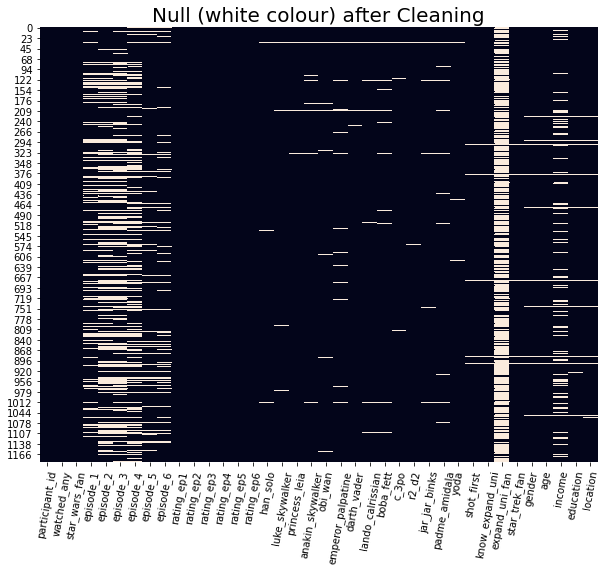

In [24]:
check = star_wars.isnull()
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(check,cbar=False)
ax.set_xticklabels(labels = star_wars.columns, rotation=80)
ax.set_title("Null (white colour) after Cleaning", size=20)
plt.show()

After removing all the invalid participant data another issue seems to reveal itself. While there are a number of survey responses wherein the the respondent has highlighted that they have seen only some or none of the movies, every respondent has given a ranking for all the Star Wars episodes. This seems incongrous.

A user in the Dataquest Community by the username *kwu* had highlighted this issue and revealed that the analysis by the fivethirtyeight team had only considered the survey responses of 471 participants when rating the best and worst movies since they were the only ones that watched all six. 

The data from fans that had not seen all the movies was used in conjunction with data from fans that had seen all movies for other analytical purposes as highlighted in their [article](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/)

[Index](#Index)

# 4

## Fan Force
**Fan base Demographic**

Star-Wars has a large following. Fans are from various demographics. We shall begin by analysing the spread of fans across the provided demographic elements namely, gender, age, income and education.

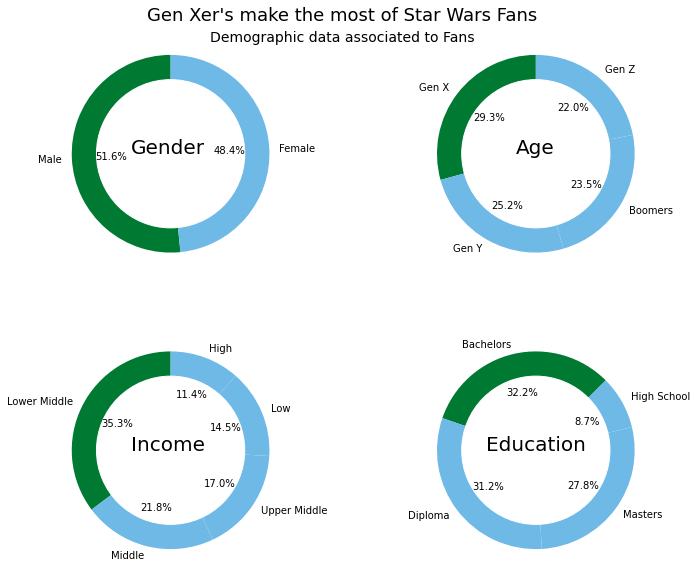

In [25]:
#Calculate percentage for each demographic element
gender_percent = star_wars['gender'].value_counts(normalize=True)
age_percent = star_wars['age'].value_counts(normalize=True)
income_percent = star_wars['income'].value_counts(normalize=True)
education_percent = star_wars[star_wars['education']!= 'Primary School']['education'].value_counts(normalize=True)

import matplotlib.pyplot as plt
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(12,10))

#Draw default plots
for ax in [ax1,ax2,ax3,ax4]:
    circle = plt.Circle((0,0),0.75,color='white')
    ax.add_artist(circle)

#Set color scheme for donut plots
gender_color = ['#007A33' if gender_percent[i]==gender_percent.max() else '#6fb9e6' for i in range(len(gender_percent))]
age_color = ['#007A33' if age_percent[i]==age_percent.max() else '#6fb9e6' for i in range(len(age_percent))]
income_color = ['#007A33' if income_percent[i]==income_percent.max() else '#6fb9e6' for i in range(len(income_percent))]
education_color = ['#007A33' if education_percent[i]==education_percent.max() else '#6fb9e6' for i in range(len(education_percent))]

#Draw the actual plots
ax1.pie(round(gender_percent*100,2), labels=gender_percent.index, 
        autopct='%1.1f%%',startangle=90,colors=gender_color)
ax1.text(s="Gender",x=-0.4,y=-0,size=20)

ax2.pie(round(age_percent*100,2), labels=age_percent.index, 
        autopct='%1.1f%%', startangle=90,colors=age_color)
ax2.text(s="Age",x=-0.2,y=-0,size=20)

ax3.pie(round(income_percent*100,2), labels=income_percent.index, 
        autopct='%1.1f%%', startangle=90,colors=income_color)
ax3.text(s="Income",x=-0.4,y=-0,size=20)

ax4.pie(round(education_percent*100,2), labels=education_percent.index, 
        autopct='%1.1f%%', startangle=45,colors=education_color)
ax4.text(s="Education",x=-0.5,y=-0,size=20)

#Define Title
plt.figtext(.5,.9,'Gen Xer\'s make the most of Star Wars Fans', fontsize=18, ha='center', va='center')

#Define Subtitle
plt.figtext(.5,.87,'Demographic data associated to Fans',fontsize=14,ha='center',va='center')
plt.show()

Star Wars **fans** are mainly **Males**. The Phantom Menace was released in 1977, so its not a surprise that a majority of the fans are **Gen Xers** who have been emotionally invested with the franchise since their younger days. Slightly **more than a third** of the fans holds a **bachelor's degree**. A **majority** of the fans come from middle class incomes specifically the **lower middle class**.

[Index](#Index)

# 5

## Fan Favourite
**Best and Worst Movies as voted by Fans**

Repondents of the survey had assigned ranks to the six movies of the Star Wars franchise. Rank 1 for the best and Rank 6 for the worst. Based on the rankings assigned, we can find the all time fan favourite movie and the movie that is considered the worst among fans.

Before proceeding with the analysis we need to make a consideration. We noticed earlier that there were a few scenarios wherein a respondent would not have seen all movies but would have rated all of them. This means that we cannot consider all records for the ratings.

Instead, we shall filter out ratings wherein the respondent has watched all movies and attempt to find the movie most preferred by fans.

In [26]:
seen_all=star_wars[star_wars[star_wars.columns[3:9]].sum(axis=1)==6].copy()
print('\033[1m'+"Number of respondents who have seen all movies:"+'\033[0m',seen_all.shape[0])

Number of respondents who have seen all movies: 471


In [27]:
#Calculate first ranks allocated to each movie by percentage 
movies=['I The Phantom Menace','II Attack of the Clones','III Revenge of the Sith',
        'IV A New Hope','V The Empire Strikes Back','VI Return of the Jedi']
dict_best={}
for i,each_col in zip(range(6),seen_all.columns[9:15]):
    dict_best[movies[i]]=round(seen_all[seen_all[each_col]==1].shape[0]/seen_all.shape[0] * 100,1)
user_best = pd.Series(dict_best)

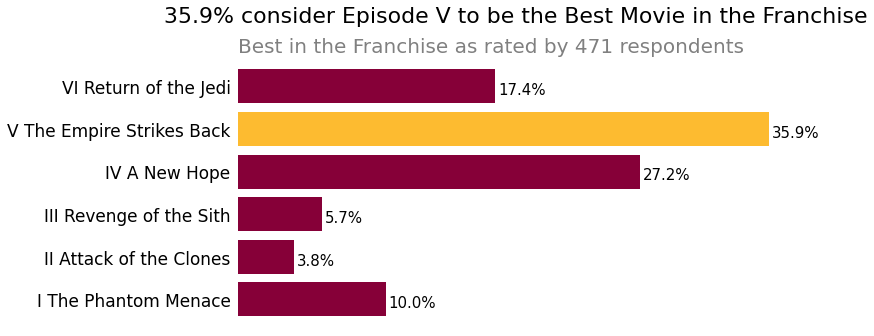

In [28]:
fig,ax=plt.subplots(figsize=(10,5))

#Plot graph
bar_color=['#FDBB30' if user_best[i]==user_best.max() else '#860038' for i in range(6)]
ax.barh(y=user_best.index,width=user_best,color=bar_color)

#Customize plot
for each_pos in ["top","bottom","left","right"]:
    ax.spines[each_pos].set_visible(False)
ax.set_xticks([])
ax.tick_params(axis='y',left=False,labelbottom=False,labelsize=17)

#Annotate bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_width())
    y=p.get_y()
    x=p.get_x()+p.get_width()
    ax.annotate(percentage,(x,y),xytext=(3,9),textcoords='offset points',size=15)
    
#Set Title
ax.text(-5,6.5,s="35.9% consider Episode V to be the Best Movie in the Franchise",size=22)

#Set Sub-title
ax.text(0,5.8,s="Best in the Franchise as rated by 471 respondents",size=20,color='grey')
plt.show()

In [29]:
##Calculate last ranks allocated to each movie by percentage 
dict_worst={}
for i,each_col in zip(range(6),seen_all.columns[9:15]):
    dict_worst[movies[i]]=round(seen_all[seen_all[each_col]==6].shape[0]/seen_all.shape[0] * 100,1)
user_worst = pd.Series(dict_worst)

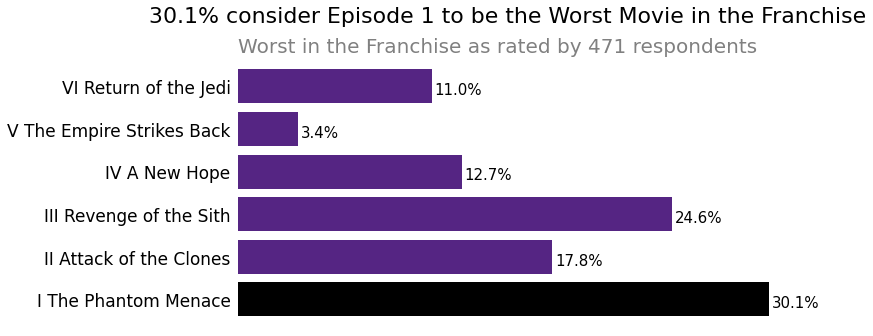

In [30]:
fig,ax=plt.subplots(figsize=(10,5))

#Plot graph
bar_color=['#000000' if user_worst[i]==user_worst.max() else '#552583' for i in range(6)]
ax.barh(y=user_worst.index,width=user_worst,color=bar_color)

#Customize plot
for each_pos in ["top","bottom","left","right"]:
    ax.spines[each_pos].set_visible(False)
ax.tick_params(axis='y',left=False,labelbottom=False,labelsize=17)
ax.set_xticks([])

#Annotate bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_width())
    y=p.get_y()
    x=p.get_x()+p.get_width()
    ax.annotate(percentage,(x,y),xytext=(3,9),textcoords='offset points',size=15)

#Set Title
ax.text(-5,6.5,s="30.1% consider Episode 1 to be the Worst Movie in the Franchise",size=22)

#Set Sub-title
ax.text(0,5.8,s="Worst in the Franchise as rated by 471 respondents",size=20,color='grey')
plt.show()

Hardcore fans of the franchise who have watched all six movies resoundingly voted on **The Empire Strikes Back** as being the **best** movie in the franchise. On the other hand the **The Phantom Menace** is considered to be the **least** favourite among fans. However, it must be noted that nearly a tenth of the fans consider the *The Phantom Menace* to be the best in the franchise.

[Index](#Index)

# 6

## Wait.. I have seen that!
**Most Watched Movie by Fans(who have not seen all movies)**

The most diligent fans of Star Wars have watched all the movies. However, the data also contains fans who haven't watch all movies. It would be interesting to find out the movies commonly watched by those who have not seen all of them.

The most watched movie is likely to be the movie that influenced most respondents to be a fan.

In [31]:
seen_some=star_wars[star_wars[star_wars.columns[3:9]].sum(axis=1)<6].copy()
print('\033[1m'+"Number of respondents who have not seen all movies:"+'\033[0m',seen_some.shape[0])

Number of respondents who have not seen all movies: 365


In [32]:
#Calculate the number of respondents who watched each movie by percentage
dict_some={}
for i,each_col in zip(range(6),seen_some.columns[3:9]):
    dict_some[movies[i]]=round(seen_some[each_col].sum()/seen_some.shape[0] * 100,1)
some_best = pd.Series(dict_some)

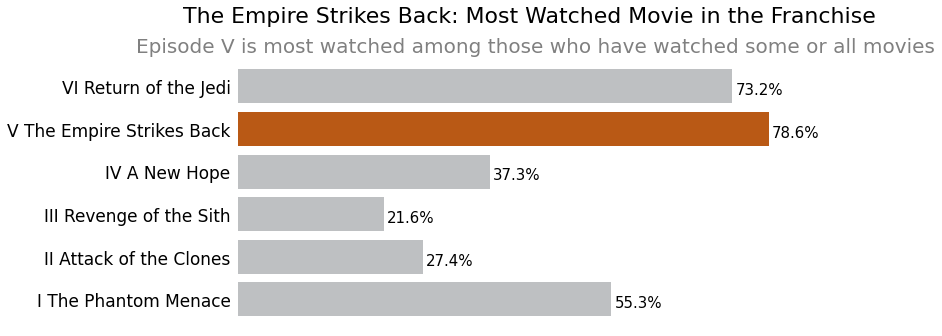

In [33]:
fig,ax=plt.subplots(figsize=(10,5))

#Plot graph
bar_color=['#B95915' if some_best[i]==some_best.max() else '#Bec0c2' for i in range(6)]
ax.barh(y=some_best.index,width=some_best,color=bar_color)

#Customize plot
for each_pos in ["top","bottom","left","right"]:
    ax.spines[each_pos].set_visible(False)
ax.set_xticks([])
ax.tick_params(axis='y',left=False,labelbottom=False,labelcolor='black',labelsize='17')

#Annotate bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_width())
    y=p.get_y()
    x=p.get_x()+p.get_width()
    ax.annotate(percentage,(x,y),xytext=(3,9),textcoords='offset points',size=15)

#Set Title
ax.text(-8,6.5,s="The Empire Strikes Back: Most Watched Movie in the Franchise",size=22)

#Set Sub-title
ax.text(-15,5.8,s="Episode V is most watched among those who have watched some or all movies",size=20,color='grey')
#ax.invert_yaxis()
plt.show()

**The Empire Strikes Back** is clearly a fan favourite even among those who have not seen all movies in the franchise.

[Index](#Index)

# 7

## Quite the Character
**Some of the Best, Worst and Controversial Characters in the Franchise**

There are number of character in the Star Wars franchise. Some good, some bad, some either, depending on where one stand with regards to morality.

Below we shall analyse which charachters fans loved versus those they found absolutely unfavourable.

In [34]:
chars=['Han Solo','Luke Skywalker','Princess Leia','Anakin Skywalker',
       'Obi Wan','Emperor Palpatine','Darth Vader','Lando Calrissian',
       'Boba Fett','C-3PO','R2-D2','Jar Jar Binks','Padme Amidala','Yoda']
dict_favor={}
dict_not_favor={}
dict_neutral={}
dict_unfamiliar={}

#Calculate the degree of favourability for each character by percentage
for i,each_col in zip(range(len(chars)),star_wars.columns[15:29]):
    dict_favor[chars[i]] = round(((star_wars[each_col]==2) | (star_wars[each_col]==1)).sum()/star_wars.shape[0] * 100)
    dict_not_favor[chars[i]] = round(((star_wars[each_col]==-2) | (star_wars[each_col]==-1)).sum()/star_wars.shape[0] * 100)
    dict_neutral[chars[i]] = round((star_wars[each_col]==0).sum()/star_wars.shape[0] * 100)
    dict_unfamiliar[chars[i]] = round((star_wars[each_col]==3).sum()/star_wars.shape[0] * 100)

#Convert the above calculated data to Dataframe
favor=pd.DataFrame([dict_favor,dict_not_favor,dict_neutral,dict_unfamiliar]).T
favor.rename(columns={0:'Favourable',1:'Unfavourable',2:'Neutral',3:'Unfamiliar'},inplace=True)
favor = favor.sort_values('Favourable',ascending=False)

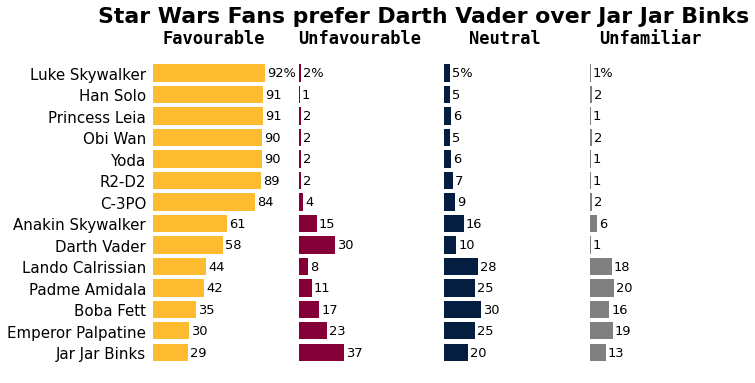

In [35]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows=1,ncols=4,figsize=(10,6))
bar_colors = ['#FDBB30','#860038','#041E42','grey']

#Plot the graphs
for i,ax in zip(range(4),[ax1,ax2,ax3,ax4]):
    for pos in ['left','right','top','bottom']:
        ax.spines[pos].set_visible(False)
    ax.barh(y=favor.index,width=favor[favor.columns[i]],color = bar_colors[i])
    
    #Customize each plot
    ax.tick_params(axis='y',left=False,labelsize=15)
    ax.set_xticks([])
    if ax!=ax1:
        ax.set_yticks([])
    
    #Annotate bars
    j=0
    for p in ax.patches:
        
        #Add '%' symbol to the value associated to the first bar
        if j==0:
            value='{}%'.format(p.get_width())
        else:
            value=p.get_width()
            
        x=p.get_x()+p.get_width()
        y=p.get_y()
        ax.annotate(value,(x,y),xytext=(2,-12),textcoords='offset points',size=13)
        j+=1
    
    #Set limits of each plot to ensure that they have a standard range
    ax.set_xlim([0,100])
    
    #Set title for each plot
    ax.set_title(favor.columns[i],weight='semibold',fontproperties='monospace',size=17)
    ax.invert_yaxis()

plt.suptitle("Star Wars Fans prefer Darth Vader over Jar Jar Binks",size=22,weight='bold')
plt.show()

**Luke Skywalker** is the **most favourable** charachter among fans while **Jar Jar Binks** is held to be **least favourable**. Given the fact that Darth Vader is the antagonist, it is surprising to see that he is held in more favor than Jar Jar Binks. A [lot of the hate](https://screenrant.com/star-wars-jar-jar-binks-hatred-explained/) that the character accrued was surprisingly from the original fans of the Star Wars franchise. Over time it became a characteristic to join the fan club.

**Darth Vader** seems to be a **controversial** character. Taking in to consideration that he is from the darkside, many fans are still inclined to [voting favourably](https://www.quora.com/Why-does-Darth-Vader-have-so-many-fans-I-know-he-was-Anakin-and-he-is-the-one-who-killed-the-Emperor-but-he-is-still-the-one-who-destroyed-the-Jedi-Order-and-even-killed-younglings) towards him.

[Index](#Index)

# 8

## Hans? Greedo? Who Knows?!
**Fan opinion on who shot first**

In the first episode of the Star Wars Franchise there is a scene wherein the character of Harrison Ford, Han Solo, shoots Greedo an alien bounty hunter. The 1997 anniversary edition of the movie revised this scene to show that Greedo shot first and missed before Han Solo shot back in defense.

The [change did not sit well](https://en.wikipedia.org/wiki/Han_shot_first) with fans giving rise to the *Han shot first* controversy.

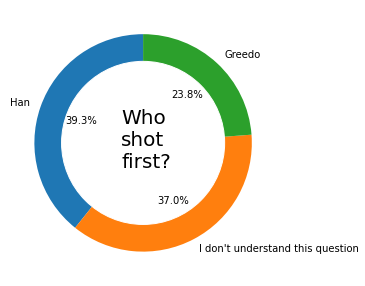

In [36]:
#Calculate fan choice of who shot first by percentave
result=star_wars['shot_first'].value_counts(normalize=True)*100

#Plot fan choice
fig,ax=plt.subplots(figsize=(10,5))
ax.pie(result, labels=result.index, 
        autopct='%1.1f%%',startangle=90)
circle = plt.Circle((0,0),0.75,color='white')
ax.add_artist(circle)
ax.text(s="Who\nshot\nfirst?",x=-0.2,y=-0.23,size=20)
plt.show()

Clearly most fans still believe that **Han shot first**.

[Index](#Index)

# 9

## Conclusion

In this project, we had acquired a Star Wars survey dataset created by the fivethirtyeight team. We cleaned the dataset and proceeded to analyse the dataset to understand some of the thoughts Star Wars fans have towards the franchise.

After analysing fan demographics we found that a majority of fans are males and fans come from middle class families. We also found that all fans unanimously loved Star Wars Episode V-The Empire Strikes Back. Further analysis also revealed that most fans preferred Darth Vader over Jar Jar Binks and that characters like Luke Skywalker, Han Solo, Yoda in addition to a few others are in almost equal favourable standing with fans. Finally most fans concluded that Han Solo shot first and not Greedo.

The primary purpose of the project was to clean the dataset in a manner that allows better analsis. We have done the same.

May the force be with you!

[Index](#Index)

# 10

## Learnings

- https://www.kite.com/python/answers/how-to-plot-a-circle-using-matplotlib-in-python
- https://www.analyticsvidhya.com/blog/2021/06/donut-plots-data-visualization-with-python/
- https://www.marsja.se/pandas-count-occurrences-in-column-unique-values/
- https://www.data-to-viz.com/caveat/pie.html
- https://stackoverflow.com/questions/59153347/matplotlib-pie-donut-chart-annotation-text-size
- https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
- https://stackoverflow.com/questions/1388450/giving-graphs-a-subtitle-in-matplotlib
- https://towardsdatascience.com/annotating-bar-charts-and-other-matplolib-techniques-cecb54315015

[Index](#Index)